## Observations and Insights 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results = study_results.sort_values("Tumor Volume (mm3)")


# Combine the data into a single dataset
combined_data=pd.merge(left=mouse_metadata, right=study_results, how="outer")
combined_data=combined_data.rename(columns={"Age_months":"Age (Months)"})
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,40,24.365505,1
2,k403,Ramicane,Male,21,16,35,26.546993,1
3,k403,Ramicane,Male,21,16,30,31.099498,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count= combined_data["Mouse ID"].value_counts()
mice_count

g989    13
k403    10
b879    10
a411    10
a685    10
o562    10
j989    10
k382    10
g570    10
s565    10
u364    10
e476    10
a492    10
l661    10
a520    10
h246    10
s337    10
w350    10
k862    10
t724    10
k483    10
l897    10
c302    10
r944    10
m269    10
z795    10
i738    10
k894    10
g296    10
l733    10
l471    10
e584    10
i334    10
c758    10
y865    10
u196    10
e227    10
c832    10
x822    10
r811    10
x401    10
o795    10
b128    10
a262    10
a251    10
q633    10
a275    10
i635    10
v923    10
y163    10
q511    10
s185    10
u327    10
x773    10
j365    10
d251    10
j913    10
p136    10
p189    10
a644    10
x581    10
g791    10
s508    10
j296    10
t198    10
a818    10
i177    10
x402    10
g288    10
v991    10
r554    10
r604    10
b559    10
c559    10
m550    10
c757    10
c402    10
o331    10
c282    10
z581    10
l509    10
a963    10
z578    10
b742    10
n304    10
y478    10
j119    10
c766    10
o926    10
t718    10
m601    10

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.duplicated(subset=['Mouse ID','Timepoint'])

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
combined_data = combined_data.sort_values("Drug Regimen")

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count= combined_data["Mouse ID"].value_counts()
mice_count

j984    10
u364    10
w575    10
y769    10
k382    10
j989    10
a492    10
a411    10
i334    10
y793    10
a203    10
s565    10
g296    10
t198    10
j296    10
g791    10
e476    10
i635    10
e584    10
p438    10
g570    10
l733    10
a963    10
y865    10
i738    10
l700    10
i177    10
a520    10
j365    10
s508    10
a685    10
c264    10
k862    10
m546    10
x581    10
p189    10
l725    10
q633    10
n304    10
u196    10
w350    10
b128    10
a262    10
a251    10
c758    10
o562    10
a275    10
x402    10
q511    10
a699    10
j913    10
p136    10
b879    10
a818    10
d251    10
k403    10
c832    10
r811    10
w914    10
o795    10
i901    10
w422    10
v923    10
y163    10
x822    10
s185    10
y260    10
h246    10
s710    10
l471    10
l661    10
a444    10
m269    10
l509    10
z581    10
s337    10
u327    10
k210    10
c757    10
z578    10
g316    10
r604    10
r554    10
v991    10
b559    10
z795    10
c282    10
o926    10
x773    10
g288    10
b742    10

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = combined_data.groupby("Drug Regimen")
regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen["Tumor Volume (mm3)"].median()
regimen_var = regimen["Tumor Volume (mm3)"].var()
regimen_std = regimen["Tumor Volume (mm3)"].std()
regimen_sem = regimen["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Table_DF = pd.DataFrame({"Mean":regimen_mean, "Median":regimen_median, "Variance":regimen_var, 
                                "Standard Deviation":regimen_std, "SEM":regimen_sem})
Summary_Table_DF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.369428,50.783528,43.219994,6.574191,0.526357
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Table2_DF = regimen.agg({"Tumor Volume (mm3)":['mean', 'median', 'var','std','sem']})
Summary_Table2_DF.rename(columns={'mean':'Mean', 'median':'Median', 'var':'Variance', 
                                        'std':'Standard Deviation','sem':'SEM'})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.369428  50.783528  43.219994           6.574191   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.526357  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

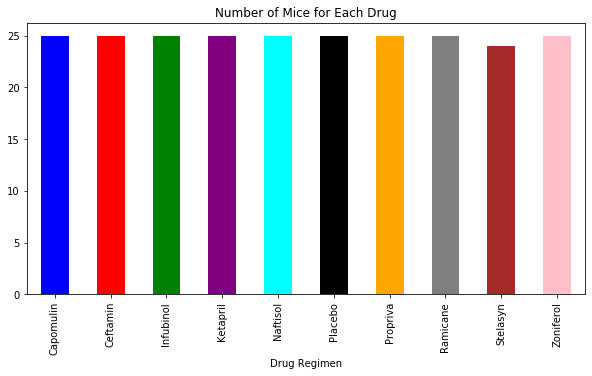

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_combined_data = combined_data.drop_duplicates(subset=['Mouse ID','Drug Regimen'], keep='first')
mouse_combined_data = mouse_combined_data.groupby('Drug Regimen')
mouse_combined_data_count = mouse_combined_data['Mouse ID'].count()
mouse_combined_data_count.plot(kind='bar', title="Number of Mice for Each Drug",y="Number of Mice", figsize=(10,5),
                               color=['blue','red','green','purple','aqua','black','orange','gray','brown','pink'])

Text(0, 0.5, 'Number of Mice')

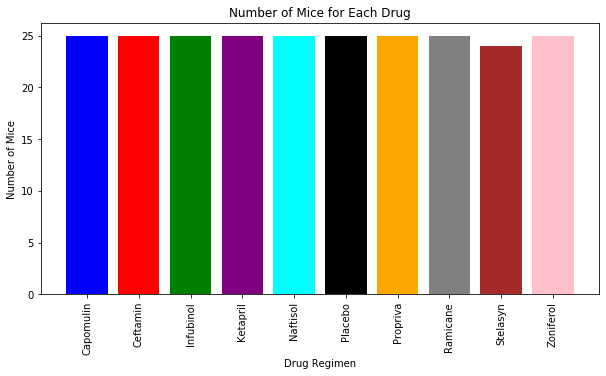

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_combined_data))
tick_locations=[value for value in x_axis]
Drug_Regimen = combined_data["Drug Regimen"].unique()
# Show the chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, mouse_combined_data_count,
        color=['blue','red','green','purple','aqua','black','orange','gray','brown','pink'])
plt.xticks(tick_locations, Drug_Regimen, rotation="vertical")
plt.title("Number of Mice for Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

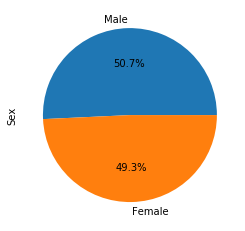

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_DF = combined_data['Sex'].value_counts()
Sex_DF.plot(kind='pie',y='Sex',autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x28cce28e188>,
 [Text(-0.03028160323480587, 1.2996472692640608, 'Male'),
  Text(0.0279521368181973, -1.1996744050146677, 'Female')],
 [Text(-0.018634832759880534, 0.7997829349317297, '50.7%'),
  Text(0.016305413143948424, -0.6998100695918895, '49.3%')])

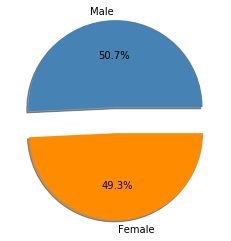

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_DF = combined_data['Sex'].value_counts()
labels = ['Male', 'Female']
colors=['steelblue','darkorange']
explode = [0.2,0.1]
plt.pie(Sex_DF, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, explode = explode)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top4_data = combined_data.loc[(combined_data["Drug Regimen"]=="Capomulin")| (combined_data["Drug Regimen"]=="Ramicane") |
                              (combined_data["Drug Regimen"]=="Infubinol") |(combined_data["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = top4_data.groupby(["Mouse ID"])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(left=max_tumor, right=top4_data,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (Months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df=merged_data.loc[merged_data["Drug Regimen"]==drug]
    final_tumor_vol = drug_df['Tumor Volume (mm3)']
   
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
dict={"Capomulin":tumor_vol[0],"Ramicane":tumor_vol[1], "Infubinol":tumor_vol[2], "Ceftamin":tumor_vol[3]}
dict_df=pd.DataFrame.from_dict(dict)
quartiles = dict_df.quantile([.25,.5,.75])
lowerq = quartiles.loc[[.25]]
upperq = quartiles.loc[[.75]]
lowerq
upperq

,Capomulin,Ramicane,Infubinol,Ceftamin
0.75,40.15922,40.659006,65.525743,64.29983


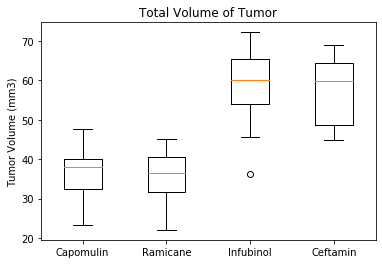

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_axis=np.arange(len(tumor_vol))+ 1
tick_location= [value for value in x_axis]
fig1, ax1 = plt.subplots()
ax1.set_title('Total Volume of Tumor')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.xticks(tick_location, treatments_list)
plt.show()

## Line and Scatter Plots

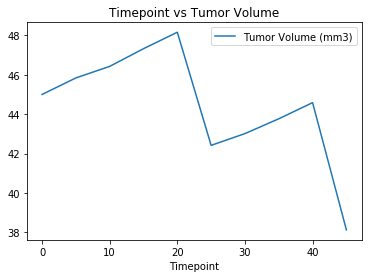

In [56]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="j119"]
capomulin_mouse_df = capomulin_mouse_df.sort_values("Timepoint")
capomulin_mouse_df.plot(kind='line', x="Timepoint", y="Tumor Volume (mm3)", title ="Timepoint vs Tumor Volume")

Text(0, 0.5, 'Mouse Tumor Volume (mm3)')

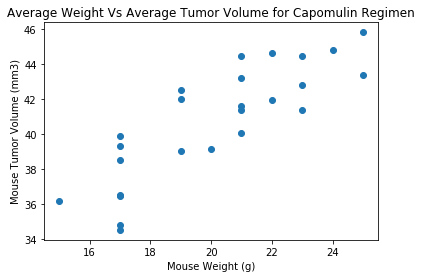

In [87]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse = capomulin_df.groupby("Mouse ID")
cap_mouse_vol = cap_mouse["Tumor Volume (mm3)"].mean()
cap_mouse_weight = cap_mouse["Weight (g)"].mean()
plt.scatter(cap_mouse_weight,cap_mouse_vol)

plt.title("Average Weight Vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mouse Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84


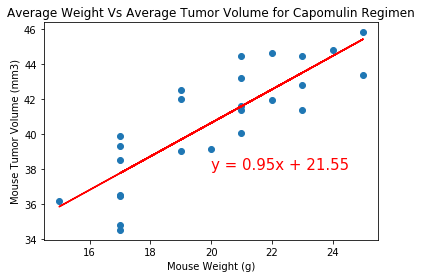

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_mouse = capomulin_df.groupby("Mouse ID")
cap_mouse_vol = cap_mouse["Tumor Volume (mm3)"].mean()
cap_mouse_weight = cap_mouse["Weight (g)"].mean()
plt.scatter(cap_mouse_weight,cap_mouse_vol)

plt.title("Average Weight Vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mouse Tumor Volume (mm3)")
correlation = st.pearsonr(cap_mouse_weight,cap_mouse_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mouse_weight, cap_mouse_vol)
regress_values = cap_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cap_mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.show()